## ATTEMPT AT MAKING AN EXPECTED GOALS MODEL

#### DATA EXPLORATION

We start off by importing pandas library to handle the data

In [1]:
import pandas as pd

Reading in the data into a DataFrame

In [2]:
df = pd.read_excel('output.xlsx')

In [3]:
df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,242611,2,MissedShots,0.936,0.534,0.107219,Ari,h,2930,OpenPlay,2018,Head,9071,FC Krasnodar,Ural,2,0,2018-12-02 11:00:00,Wanderson,Chipped
1,242612,4,SavedShot,0.806,0.707,0.021672,Cristian Ramírez,h,5477,OpenPlay,2018,LeftFoot,9071,FC Krasnodar,Ural,2,0,2018-12-02 11:00:00,NaN,None
2,242613,4,SavedShot,0.778,0.505,0.023818,Mauricio Pereyra,h,2922,OpenPlay,2018,RightFoot,9071,FC Krasnodar,Ural,2,0,2018-12-02 11:00:00,Viktor Claesson,Pass
3,242614,17,MissedShots,0.933,0.410,0.018640,Ari,h,2930,FromCorner,2018,Head,9071,FC Krasnodar,Ural,2,0,2018-12-02 11:00:00,Mauricio Pereyra,Aerial
4,242617,21,SavedShot,0.711,0.534,0.015957,Ivan Ignatyev,h,6025,OpenPlay,2018,RightFoot,9071,FC Krasnodar,Ural,2,0,2018-12-02 11:00:00,Ari,Pass


The data has quire a few columns related to shots

In [4]:
df.describe()

,id,minute,X,Y,xG,player_id,season,match_id,h_goals,a_goals
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.0,18.0,18.0,18.0
mean,242624.222222,43.777778,0.829333,0.477722,0.092411,4617.833333,2018.0,9071.0,2.0,0.0
std,8.243040,26.152394,0.085072,0.111548,0.134575,1613.053489,0.0,0.0,0.0,0.0
min,242611.000000,2.000000,0.685000,0.318000,0.013119,2790.000000,2018.0,9071.0,2.0,0.0
25%,242618.000000,23.500000,0.773500,0.391250,0.022168,2923.750000,2018.0,9071.0,2.0,0.0
50%,242625.500000,48.500000,0.801000,0.480000,0.045508,5477.000000,2018.0,9071.0,2.0,0.0
75%,242629.750000,63.250000,0.913500,0.526750,0.094991,5926.000000,2018.0,9071.0,2.0,0.0
max,242640.000000,87.000000,0.936000,0.733000,0.523555,6799.000000,2018.0,9071.0,2.0,0.0


In [5]:
df.describe(include=['O'])

,result,player,h_a,situation,shotType,h_team,a_team,player_assisted,lastAction
count,18,18,18,18,18,18,18,12,18
unique,4,10,1,3,3,1,1,7,6
top,MissedShots,Magomed-Shapi Suleymanov,h,OpenPlay,RightFoot,FC Krasnodar,Ural,Viktor Claesson,Pass
freq,7,3,18,14,12,18,18,5,9


The dataset has around 226,500 shots which aren't really a lot but enough to have a basic model running.

In [6]:
df.columns

Index(['id', 'minute', 'result', 'X', 'Y', 'xG', 'player', 'h_a', 'player_id',
       'situation', 'season', 'shotType', 'match_id', 'h_team', 'a_team',
       'h_goals', 'a_goals', 'date', 'player_assisted', 'lastAction'],
      dtype='object')

#### PRE-PROCESSING

The X & Y co-ordinates present in the data are scaled from 0 to 1 so I had to find a suitable multipliying factor. The field was considered to be of dimensions of 104*76 yards.
The co-ordinates were scaled acccordingly.

In [7]:
df['X'] = df['X']*104
df['Y'] = df['Y']*76

Let's try and plot the shot locations

<Figure size 432x288 with 0 Axes>

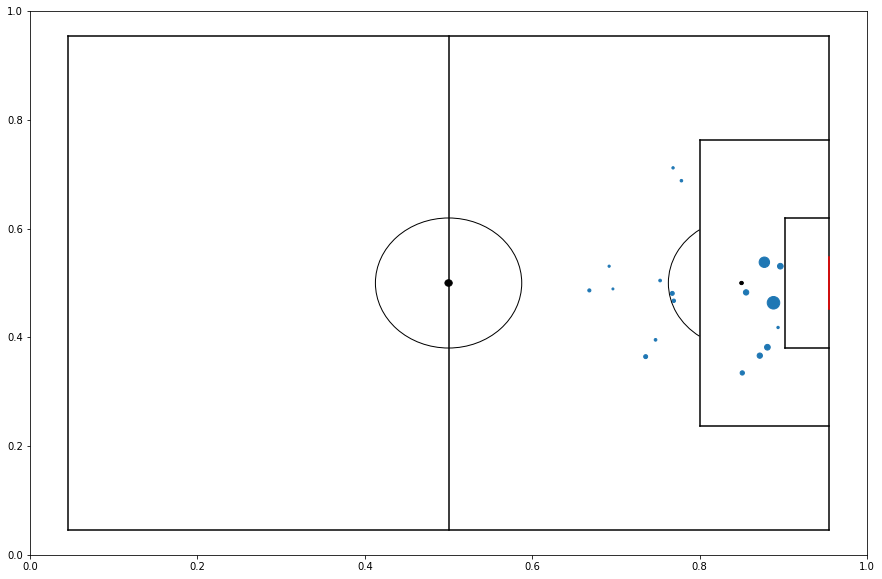

In [16]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

fig=plt.figure()
# la siguiente linea estaba comentada en el codigo inicial
# fig,ax = plt.subplots(figsize=(10.4,7.6))
fig,ax = plt.subplots(figsize=(15,10))
ax=fig.add_subplot(1,1,1)
ax.axis('off')

plt.plot([0,104],[0,0],color="black")
plt.plot([0,0],[76,0],color="black")
plt.plot([0,104],[76,76],color="black")
plt.plot([104,104],[76,0],color="black")
plt.plot([52,52],[0,76],color="black")

plt.plot([104,86.32],[60,60],color="black")
plt.plot([86.32,104],[16,16],color="black")
plt.plot([86.32,86.32],[60,16],color="black")
plt.plot([104,97.97],[48,48],color="black")
plt.plot([104,97.97],[27.968,27.968],color="black")
plt.plot([97.97,97.97],[48,27.968],color="black")

plt.plot([104,104],[34,42],color="red")

penaltySpot = plt.Circle((92.04,38),0.25,color="black")
centreSpot = plt.Circle((52,38),0.5,color="black")
centreCircle = plt.Circle((52,38),10,color="black",fill=False)

D = Arc((92.04,38),height=20,width=20,angle=0,theta1=125,theta2=235,color="black")

ax.add_patch(centreSpot)
ax.add_patch(centreCircle)
ax.add_patch(penaltySpot)
ax.add_patch(D)


plt.scatter(df['X'],df['Y'], s=df['xG']*300)
plt.show()

All the shots are when the team is attacking from right to left. The shots on the left end of the pitch are perhaps own goals that will have to be removed.

We know that distance is a major factor for shots to be converted into goals and thus I added a distance feature. The distance will be measured from the shot location to the centre of the goal.

In [17]:
df['distance'] = (((df['X']-104)**2 + (df['Y']-38)**2)**(1/2))

Another important factor to be taken into account is the angle of view the striker has. A smaller angle will obviously minimize the chance of a shot being converted into a goal.

We use trigonometry to find the angle extended by both the goal posts onto the shot location.



cos c = (A^2+B^2-C^2)/2*A*B

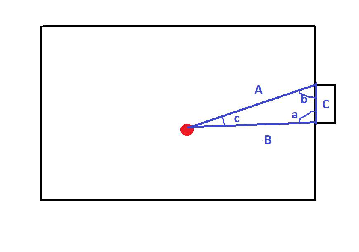

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("angle.jpg")
plt.imshow(image)
plt.axis('off')
plt.show()

Pardon my paint skills, but the diagram above explains the angle c we are trying to find. The Red Dot is the shot location and the rectangle on the right is the goalmouth.

Below, I find the distance between the goal posts and the shot location and use it to find the angle extended by the goal onto the shot location.

In [18]:
import math
temp = pd.DataFrame()
temp['a'] = ((df['X']-104)**2 + (df['Y']-42)**2)
temp['b'] = ((df['X']-104)**2 + (df['Y']-34)**2)
df['angle'] = (temp['a']+temp['b']-144)/(2*temp['a']*temp['b'])
df['angle'] = df['angle'].apply(math.acos)

Distance and Angle have been added as columns to the DataFrame.

In [19]:
df.columns

Index(['id', 'minute', 'result', 'X', 'Y', 'xG', 'player', 'h_a', 'player_id',
       'situation', 'season', 'shotType', 'match_id', 'h_team', 'a_team',
       'h_goals', 'a_goals', 'date', 'player_assisted', 'lastAction',
       'distance', 'angle'],
      dtype='object')

Since the columns in the categs list are actually categories, we convert them into categories.

In [20]:
categs = ['lastAction','result','shotType', 'situation']
for categ in categs:
    df[categ] = df[categ].astype('category')

Let us have a look at the categories for each specific feature.

In [21]:
for categ in categs:
    print(categ)
    print(df[categ].cat.categories)

lastAction
Index(['Aerial', 'Chipped', 'Cross', 'None', 'Pass', 'Standard'], dtype='object')
result
Index(['BlockedShot', 'Goal', 'MissedShots', 'SavedShot'], dtype='object')
shotType
Index(['Head', 'LeftFoot', 'RightFoot'], dtype='object')
situation
Index(['DirectFreekick', 'FromCorner', 'OpenPlay'], dtype='object')


Before we can train the model, we need to remove any OwnGoals that might spoil the model and thus, we do so.

In [22]:
df = df[df['result'] != 'OwnGoal']

Introducing a binary column by the name of Goal.

In [23]:
df['goal']  = (df['result'] == 'Goal')

In [24]:
df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,...,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction,distance,angle,goal
0,242611,2,MissedShots,97.343998,40.584001,0.107219,Ari,h,2930,OpenPlay,...,FC Krasnodar,Ural,2,0,2018-12-02 11:00:00,Wanderson,Chipped,7.139987,1.572033,False
1,242612,4,SavedShot,83.823998,53.731998,0.021672,Cristian Ramírez,h,5477,OpenPlay,...,FC Krasnodar,Ural,2,0,2018-12-02 11:00:00,NaN,None,25.584503,1.569417,False
2,242613,4,SavedShot,80.912003,38.380000,0.023818,Mauricio Pereyra,h,2922,OpenPlay,...,FC Krasnodar,Ural,2,0,2018-12-02 11:00:00,Viktor Claesson,Pass,23.091124,1.569214,False
3,242614,17,MissedShots,97.032003,31.160000,0.018640,Ari,h,2930,FromCorner,...,FC Krasnodar,Ural,2,0,2018-12-02 11:00:00,Mauricio Pereyra,Aerial,9.764148,1.566612,False
4,242617,21,SavedShot,73.943998,40.584001,0.015957,Ivan Ignatyev,h,6025,OpenPlay,...,FC Krasnodar,Ural,2,0,2018-12-02 11:00:00,Ari,Pass,30.166874,1.569800,False


One Hot Encoding for the situation column is done in the DataFrame so that Logistic Regression might not misinterpret the situations as something of different weightages.

LabelBinarizer from sklearn is used to carry out the one hot encoding.

In [25]:
from sklearn.preprocessing import LabelBinarizer
le = LabelBinarizer()
le.fit(df['situation'])

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [26]:
temp = le.transform(df['situation'])

In [27]:
le.classes_

array(['DirectFreekick', 'FromCorner', 'OpenPlay'], dtype='<U14')

In [28]:
for i in range(0,len(le.classes_)):
    df['is'+le.classes_[i]] = temp[:,i]

One Hot Encoding of situation column introduces the binary columns isDirectFreekick, isFromCorner, isOpenPlay, isPenalty, isSetPiece.

One Hot Encoding of the shotType column is also done. Columns fromHead, fromLeftFoot, fromOtherBodyPart, fromRightFoot are introduced into tahe dataframe, again with the help of the LabelBinarizer function in the sklearn library.

In [29]:
le.fit(df['shotType'])
temp = le.transform(df['shotType'])

In [30]:
le.classes_

array(['Head', 'LeftFoot', 'RightFoot'], dtype='<U9')

In [31]:
for i in range(0,len(le.classes_)):
    df['from'+le.classes_[i]] = temp[:,i]

Let's look at how the dataset looks like now:

In [32]:
df

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,...,lastAction,distance,angle,goal,isDirectFreekick,isFromCorner,isOpenPlay,fromHead,fromLeftFoot,fromRightFoot
0,242611,2,MissedShots,97.343998,40.584001,0.107219,Ari,h,2930,OpenPlay,...,Chipped,7.139987,1.572033,False,0,0,1,1,0,0
1,242612,4,SavedShot,83.823998,53.731998,0.021672,Cristian Ramírez,h,5477,OpenPlay,...,None,25.584503,1.569417,False,0,0,1,0,1,0
2,242613,4,SavedShot,80.912003,38.380000,0.023818,Mauricio Pereyra,h,2922,OpenPlay,...,Pass,23.091124,1.569214,False,0,0,1,0,0,1
3,242614,17,MissedShots,97.032003,31.160000,0.018640,Ari,h,2930,FromCorner,...,Aerial,9.764148,1.566612,False,0,1,0,1,0,0
4,242617,21,SavedShot,73.943998,40.584001,0.015957,Ivan Ignatyev,h,6025,OpenPlay,...,Pass,30.166874,1.569800,False,0,0,1,0,0,1
5,242621,31,MissedShots,82.783998,35.264001,0.038981,Viktor Claesson,h,5478,OpenPlay,...,None,21.391690,1.569002,False,0,0,1,0,0,1
6,242622,36,MissedShots,78.936002,26.675999,0.052374,Mauricio Pereyra,h,2922,DirectFreekick,...,Standard,27.503400,1.569606,False,1,0,0,0,1,0
7,242624,42,BlockedShot,95.576002,28.120000,0.108435,Sergei Petrov,h,2920,OpenPlay,...,Pass,12.983765,1.566750,False,0,0,1,0,0,1
8,242625,48,MissedShots,80.287997,29.260000,0.023656,Aleksandr Martynovich,h,2790,OpenPlay,...,Pass,25.271460,1.569421,False,0,0,1,0,0,1
9,242626,49,MissedShots,74.463998,37.087999,0.013119,Yuri Gazinskiy,h,2929,OpenPlay,...,Pass,29.550078,1.569763,False,0,0,1,0,0,1


In [33]:
df.columns

Index(['id', 'minute', 'result', 'X', 'Y', 'xG', 'player', 'h_a', 'player_id',
       'situation', 'season', 'shotType', 'match_id', 'h_team', 'a_team',
       'h_goals', 'a_goals', 'date', 'player_assisted', 'lastAction',
       'distance', 'angle', 'goal', 'isDirectFreekick', 'isFromCorner',
       'isOpenPlay', 'fromHead', 'fromLeftFoot', 'fromRightFoot'],
      dtype='object')

Oh Boi, that's a lot of columns. Not to worry though. We will not be using all of them. Only a subset, atleast for this model. This subset is stored in the cols list

In [36]:
# cols = ['distance','angle','isDirectFreekick','isFromCorner','isOpenPlay','isPenalty','isSetPiece','fromHead','fromLeftFoot','fromOtherBodyPart','fromRightFoot','goal']

cols = ['distance','angle','isDirectFreekick','isFromCorner','isOpenPlay','fromHead','fromLeftFoot','fromRightFoot','goal']

We create a new DataFrame by the name of shot to store the subset data from the selected columns.

In [37]:
shot = df[cols]

The aim of this whole endeavour is to make a model which will output wether a shot is goal or not. Thus, the goal feature is taken as a series by the name of Y and the rest of the independent features are stored in the DataFrame X.

In [38]:
X=shot.drop('goal',axis=1)
Y=shot['goal']

In [39]:
X.columns

Index(['distance', 'angle', 'isDirectFreekick', 'isFromCorner', 'isOpenPlay',
       'fromHead', 'fromLeftFoot', 'fromRightFoot'],
      dtype='object')

Y series currently consists of values in the form of True and False but we would like it to be a binary value i.e. 1 or 0. Thus, we use LabelEncoder available in the sklearn library.

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y=le.fit_transform(Y)

We will have to construct both a train data set and test data set to check the validity of our model.
Thus, we break up our dataset into two parts in 70:30 ratio. 70% of shots are present in the training set and the rest 30% are used as an hold-out test set.

#### MODEL FITTING & TESTING

Lo and Behold, we are finally at the point to train the model. The first Model that I'm using here is Logistic Regression because it is realtively cheaper computationally.

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

reg = LogisticRegression()

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

reg.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
reg.score(X_test,Y_test)

1.0

We obtain an accuracy of 90.4% which is decent considering the size of data. Moreover, we did not take a lot of features into account.

90% sounds good but it's classifying wheteher a shot is a goal or not and the dataset is skewed towards having a lot more shots as not a goal in comaprisons to ones which actually ended up being a goal.

Thus, judging the performance of a model based on just the accuracy is not a good practice. Let's look at the predictions themselves with the help of a confusion matrix.

In [43]:
preds = reg.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,preds)
print(confusion_matrix)

[[6]]


The Confusion Matrix shows us Exactly how the model performed in terms of raw output. The top left value indicates shots that were rightly predicted as not goals. The righta are shots that were predicted as goals but were not.

The second row contains shots that were classified as not goal but were infact, goals. On the right of it, we have the shots that were correctly classified as goals.

Another tool to look at the performance of the model is an ROC curve. The area under ROC curve for our model is 80% which is quite good.

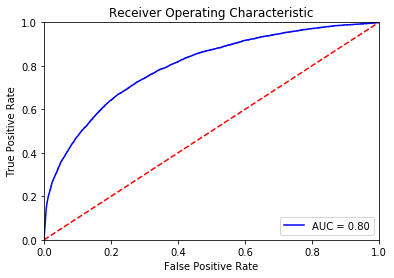

In [34]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
probs = reg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(Y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The same methodology is used to build a Random Forest Classification Model.

In [35]:
from sklearn.ensemble import RandomForestClassifier
reg2 = RandomForestClassifier()
reg2.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
reg2.score(X_test,Y_test)

0.8782698553291999

In [37]:
preds = reg2.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,preds)
print(confusion_matrix)

[[57700  2952]
 [ 5294  1794]]


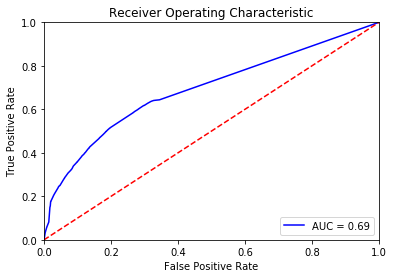

In [38]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
probs = reg2.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(Y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

As we see that the both accuracy and area under ROC curve is worse, Logistic Regression seems to be a better choice for our Expected Goals Model.

#### RESUTLS

In [39]:
temp = df[cols]
shots=shot.drop('goal',axis=1)

The below graph shows the value of xG changing as the distance and angle change.

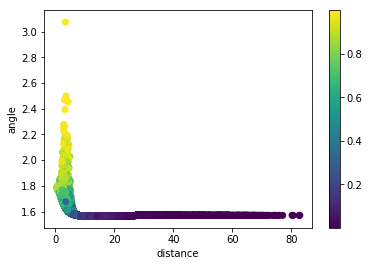

In [40]:
plt.scatter(shots['distance'],shots['angle'],c=reg.predict_proba(shots)[:,1])
plt.xlabel('distance')
plt.ylabel('angle')
plt.colorbar()

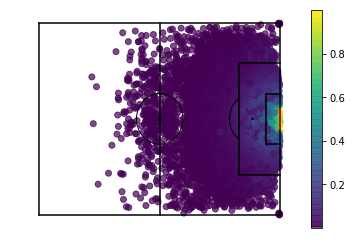

In [41]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

fig=plt.figure()
#fig,ax = plt.subplots(figsize=(10.4,7.6))
ax=fig.add_subplot(1,1,1)
ax.axis('off')

plt.plot([0,104],[0,0],color="black")
plt.plot([0,0],[76,0],color="black")
plt.plot([0,104],[76,76],color="black")
plt.plot([104,104],[76,0],color="black")
plt.plot([52,52],[0,76],color="black")

plt.plot([104,86.32],[60,60],color="black")
plt.plot([86.32,104],[16,16],color="black")
plt.plot([86.32,86.32],[60,16],color="black")
plt.plot([104,97.97],[48,48],color="black")
plt.plot([104,97.97],[27.968,27.968],color="black")
plt.plot([97.97,97.97],[48,27.968],color="black")

plt.plot([104,104],[34,42],color="red")

penaltySpot = plt.Circle((92.04,38),0.25,color="black")
centreSpot = plt.Circle((52,38),0.5,color="black")
centreCircle = plt.Circle((52,38),10,color="black",fill=False)

D = Arc((92.04,38),height=20,width=20,angle=0,theta1=125,theta2=235,color="black")

ax.add_patch(centreSpot)
ax.add_patch(centreCircle)
ax.add_patch(penaltySpot)
ax.add_patch(D)


plt.scatter(df['X'],df['Y'],c=reg.predict_proba(shots)[:,1],alpha=0.7)
plt.colorbar()
plt.show()


The above graph shows that our xG model atleast captures the intuitive nature of shot conversion. A shot from a greater angle of view and lesser distance is more likely to go in.

Thus, we add the model output of xG to the original dataframe

In [42]:
df['xG'] = reg.predict_proba(shots)[:,1]

In [43]:
df.columns

Index(['X', 'Y', 'a_goals', 'a_team', 'date', 'h_a', 'h_goals', 'h_team', 'id',
       'lastAction', 'match_id', 'minute', 'player', 'player_assisted',
       'player_id', 'result', 'season', 'shotType', 'situation', 'distance',
       'angle', 'goal', 'isDirectFreekick', 'isFromCorner', 'isOpenPlay',
       'isPenalty', 'isSetPiece', 'fromHead', 'fromLeftFoot',
       'fromOtherBodyPart', 'fromRightFoot', 'xG'],
      dtype='object')

Text(0,0.5,'Expected Goals')

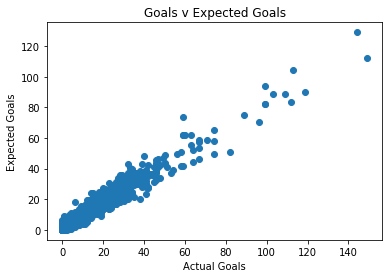

In [44]:
Actual = df.groupby('player')['goal'].sum()
Expected = df.groupby('player')['xG'].sum()

plt.scatter(Actual,Expected)
plt.title('Goals v Expected Goals')
plt.xlabel('Actual Goals')
plt.ylabel('Expected Goals')

We can see that a clear linear relationship exists between the Expected Goals and Actual Goals which is a very good sign for our model.
Let's try fitting a line to this.

Text(0,0.5,'Expected Goals')

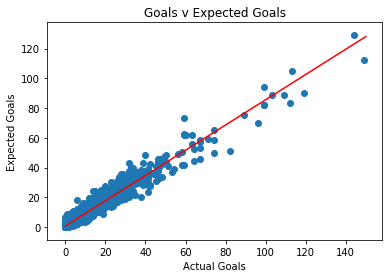

In [45]:
import numpy as np
from sklearn.linear_model import LinearRegression
lmod = LinearRegression()
lmod.fit(np.array(Actual).reshape(-1,1),Expected)

x=np.linspace(0,150,1000)
y=lmod.predict(x.reshape(-1,1))

plt.plot(x,y,color='r')
plt.scatter(Actual,Expected)
plt.title('Goals v Expected Goals')
plt.xlabel('Actual Goals')
plt.ylabel('Expected Goals')

On a side note, 10 Ballon D'or on the top right.

### CONCLUSION

The model was rather simplistic in nature and was made with very few features still managed to capture the intuitiveness of the data and is decent at predicting the number of goals given shot locations and some context data. 

The model could be refined more with more context and more importantly, more data.